<a href="https://colab.research.google.com/github/Parths131/daily-forecasting/blob/main/friday_dep_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving only-friday-data.csv to only-friday-data.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
path = '/content/only-friday-data.csv'
df = pd.read_csv(path)

In [ ]:
df

,Date,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,05-01-2018,1069,547,436,1232,650,3015,2510,2755,1948,...,1501,1481,1614,1445,2450,1677,2454,2263,1284,1683
1,12-01-2018,885,744,739,966,1017,2864,3818,2424,2171,...,1381,2135,1734,1587,1978,2592,2171,2538,1284,1764
2,19-01-2018,661,929,168,1409,528,2805,3925,2442,2001,...,1644,1233,2309,1782,1615,2252,1674,3228,1883,1642
3,26-01-2018,969,724,442,961,650,2809,3715,2480,1575,...,1226,1706,2205,1356,2287,2424,1838,1934,1776,1624
4,02-02-2018,1260,564,386,1042,398,2781,3973,2382,2147,...,1589,1440,1656,1945,2076,2249,1913,2456,1707,1733
5,09-02-2018,492,871,656,897,1006,2980,3463,2534,2244,...,1385,1756,1639,1584,2509,1929,1609,2649,2023,1940
6,16-02-2018,992,535,669,733,812,2508,4411,2536,2113,...,2081,1403,1593,2058,3125,2231,1910,2194,1104,1809
7,23-02-2018,695,774,878,1043,699,3034,2813,3333,2528,...,1532,2086,2092,1968,2857,2018,1831,2713,1471,1454
8,02-03-2018,597,884,730,947,686,3057,2707,2728,1851,...,2180,1457,1947,2067,2130,2624,1250,2459,991,1406
9,09-03-2018,1069,631,425,1038,744,2479,3718,2212,2223,...,1942,1734,1566,2619,2239,2463,1756,2264,1355,1573


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
df.reset_index(inplace=True)

long_data = df.melt(id_vars=['Date'], var_name='Hour', value_name='Passengers')

long_data['Hour'] = pd.to_numeric(long_data['Hour'])

long_data = long_data.sort_values(by=['Date', 'Hour'])

long_data.reset_index(drop=True, inplace=True)

print(long_data)

           Date  Hour  Passengers
0    2018-01-05     0        1069
1    2018-01-05     1         547
2    2018-01-05     2         436
3    2018-01-05     3        1232
4    2018-01-05     4         650
...         ...   ...         ...
1243 2018-12-28    19        2629
1244 2018-12-28    20        2206
1245 2018-12-28    21        2553
1246 2018-12-28    22        1991
1247 2018-12-28    23        1479

[1248 rows x 3 columns]


In [ ]:
long_data.fillna(0, inplace=True)

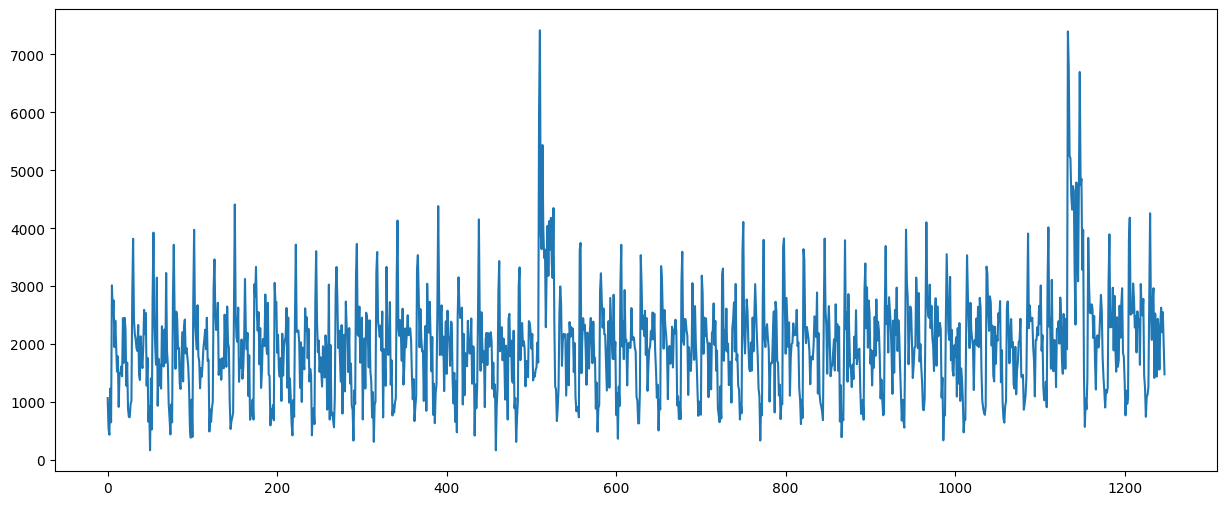

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(long_data['Passengers'])

In [ ]:
adf_test = adfuller(long_data['Passengers'].diff(12).dropna())

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -7.958970774485074
p-value: 2.984014139607803e-12


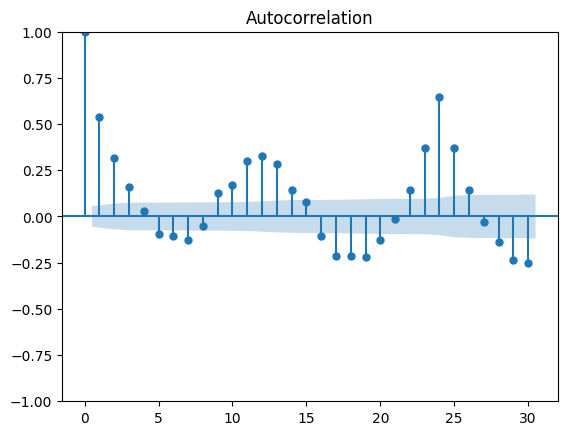

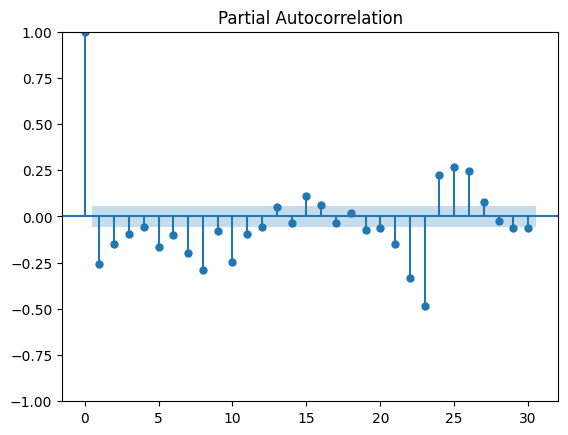

In [ ]:
acf_original = plot_acf(long_data['Passengers'].dropna(), lags=30)

pacf_original = plot_pacf(long_data['Passengers'].diff().dropna(), lags=30)

In [ ]:
long_data

,Date,Hour,Passengers
0,2018-01-05,0,1069
1,2018-01-05,1,547
2,2018-01-05,2,436
3,2018-01-05,3,1232
4,2018-01-05,4,650
...,...,...,...
1243,2018-12-28,19,2629
1244,2018-12-28,20,2206
1245,2018-12-28,21,2553
1246,2018-12-28,22,1991


In [ ]:
order = (1,0,1)
seasonal_order = (1,1,2,24)

In [ ]:
df_train = long_data.iloc[:1128]
df_test = long_data.iloc[1152:]

In [ ]:
df_test

,Date,Hour,Passengers
1152,2018-12-07,0,1421
1153,2018-12-07,1,572
1154,2018-12-07,2,1059
1155,2018-12-07,3,876
1156,2018-12-07,4,1407
...,...,...,...
1243,2018-12-28,19,2629
1244,2018-12-28,20,2206
1245,2018-12-28,21,2553
1246,2018-12-28,22,1991


In [ ]:
start_date = '2018-12-07 00:00:00'
end_date = '2018-12-28 23:00:00'

all_hours = pd.date_range(start=start_date, end=end_date, freq='H')

fridays = all_hours[all_hours.weekday == 4]

model = SARIMAX(df_train['Passengers'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

testing = model_fit.forecast(len(fridays))

testing_df = pd.DataFrame({'Date': fridays.date, 'Hour': fridays.hour, 'Passengers': testing})

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
rmse = np.sqrt(np.mean((df_test['Passengers'] - testing_df['Passengers']) ** 2))

mae = np.mean(np.abs(df_test['Passengers'] - testing_df['Passengers']))

rmse, mae

(412.1832393906274, 329.35496944922596)

In [ ]:
testing_df = testing_df.reset_index(drop=True)

In [ ]:
df_test = df_test.reset_index(drop=True)

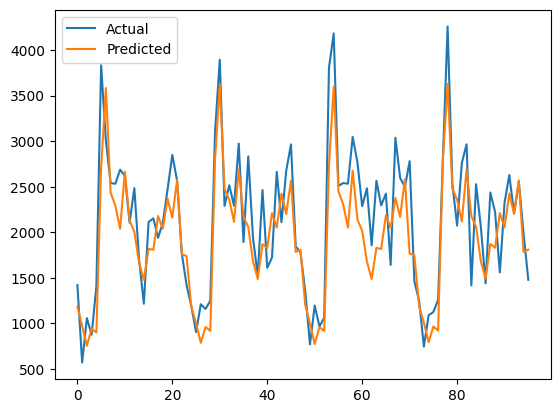

In [ ]:
plt.plot(df_test['Passengers'], label='Actual')
plt.plot(testing_df['Passengers'], label='Predicted')
#plt.plot(long_data['Passengers'][600:], label='Predicted')
plt.legend()

In [ ]:
testing_df

,Date,Hour,Passengers
0,2018-12-07,0,1184.786782
1,2018-12-07,1,975.101239
2,2018-12-07,2,754.803797
3,2018-12-07,3,944.158048
4,2018-12-07,4,900.592553
...,...,...,...
91,2018-12-28,19,2426.458248
92,2018-12-28,20,2202.632788
93,2018-12-28,21,2570.302604
94,2018-12-28,22,1785.692542
